In [1]:
using SolidStateDetectors
using Unitful
using Plots; gr(fmt = :png)


Plots.GRBackend()

In [2]:
max_tick_distance = 0.5u"mm"

0.5 mm

In [3]:
sim = Simulation{Float64}(SSD_examples[:InvertedCoaxInCryostat])
sim.detector = SolidStateDetector(sim.detector, contact_id = 2, contact_potential = 500u"V")

┌ Info: No charge drift model specified. Using default ElectricFieldChargeDriftModel.
└ @ SolidStateDetectors /home/ritaferi/Phd/SolidStateDetectors/SolidStateDetectors.jl/src/SolidStateDetector/Semiconductor.jl:81


________Public Inverted Coax________

---General Properties---
- Precision type: Float64

	_____Semiconductor_____

Semiconductor{Float64} - High Purity Germanium

# Contacts: 2
Contact 1 - 0.0 V - High Purity Germanium
Contact 2 - 500.0 V - High Purity Germanium

# Passives: 1
Passive Cryostat - id -1 - 0.0 V


In [4]:
calculate_electric_potential!(sim, refinement_limits = [0.2, 0.1, 0.05, 0.01], max_n_iterations = -1, verbose = false, depletion_handling = true; max_tick_distance)

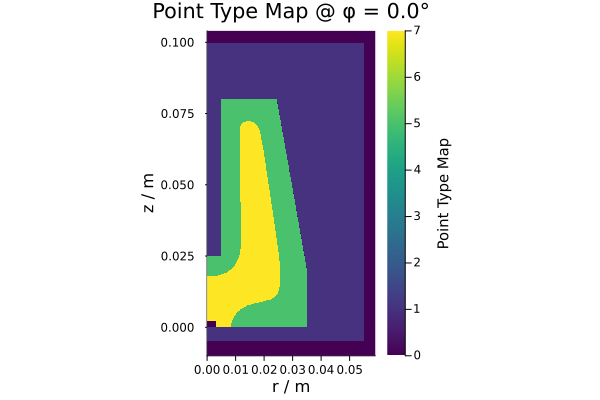

In [5]:
plot(sim.point_types)

In [ ]:
calculate_weighting_potential!(sim, 1,  max_n_iterations = -1, n_iterations_between_checks = 500_000, refinement_limits = [0.2, 0.01], depletion_handling = true; max_tick_distance)

Simulation: Public Inverted Coax
Weighting Potential Calculation - ID: 1
φ symmetry: Detector is φ-symmetric -> 2D computation.
Precision: Float64
Device: CPU
Max. CPU Threads: 1
Coordinate system: Cylindrical
N Refinements: -> 2
Convergence limit: 1.0e-7 
Initial grid size: (124, 1, 240)

Refinement step 1:
Grid size: (126, 1, 240) - using 1 threads now
📏​  Numero punti considerati: r = 126, z = 240, prodotto = 30240
🔎​ Minimo del potenziale pesato: 0.9986301581828168

In [ ]:
plot(sim.weighting_potentials[1])

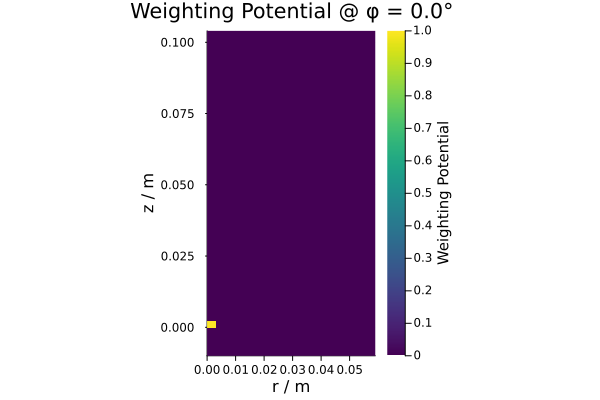

In [8]:
apply_initial_state!(sim, WeightingPotential, 1, Grid(sim; max_tick_distance))
plot(sim.weighting_potentials[1])

In [ ]:
SolidStateDetectors.update_till_convergence!( sim, WeightingPotential, 1, 1e-7, depletion_handling = true)
plot(sim.weighting_potentials[1])

In [ ]:
calculate_weighting_potential!(sim, 1, device_array_type = CuArray, refinement_limits = [0.2, 0.1, 0.05, 0.01], depletion_handling = true, grid = sim.electric_potential.grid, n_iterations_between_checks=50_000)

In [ ]:
plot(sim.weighting_potentials[1])